### Imports

In [41]:
# python libraries
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

In [42]:
# importing the data into the main file
%run "./instance/instance_10.ipynb"

In [43]:
# getting the necessary functions/algorithm into the main file
%run "./functions.ipynb"

### Defining the Master Problem

In [44]:
# suppress Gurobi output
environment = gp.Env(empty = True)
environment.setParam("OutputFlag", 0)
environment.start()

# model
master = gp.Model('master', env = environment)

# variables + objective function
z = master.addVars(potential_hubs, capacity_levels, obj = fixed_set_up_costs_with_capacity_level, vtype = GRB.BINARY, name = "z")
eta = master.addVar(1, obj = 1, name = 'eta')

# model sense
master.ModelSense = GRB.MINIMIZE

# constraints
master.addConstr(gp.quicksum(gp.quicksum(new_hub_capacities[i, q] * z[i, q] for i in potential_hubs) for q in capacity_levels) >= gp.quicksum(demand_flattened[k - 1] for k in commodities));
master.addConstrs(gp.quicksum(z[i, q] for q in capacity_levels) <= 1 for i in potential_hubs);

### Run Benders decomposition

In [45]:
z_hat, upper_bound = benders_decomp() # <--- this code would not execute on my personal computer (only on my SMU computer), but assuming you have an academic Gurobi license, it should work

GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

In [46]:
# optimal hub decisions
z_hat # <--- this code would not execute on my computer, but assuming you have an academic Gurobi license, it should work

NameError: name 'z_hat' is not defined

### Visualization

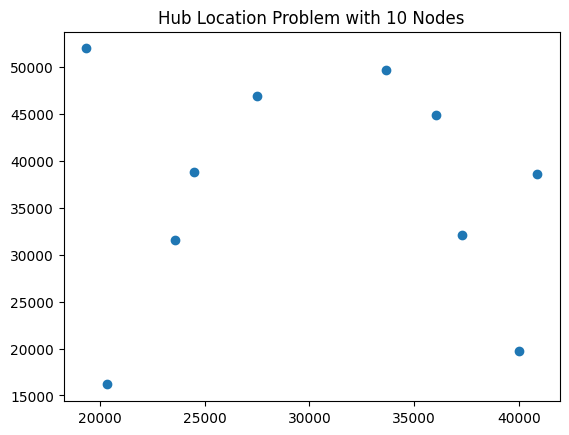

In [47]:
# There is a hub located at each potential location, indicated by the solid dots. Each hub is opened at the minimum capacity level.
plt.scatter(x_coords, y_coords)
plt.title('Hub Location Problem with 10 Nodes')
plt.show()